# Meta Data Analysis Notebook

This Jupyter notebook retrieves all Lattes CV files from a given folder and performs data analysis to give insight on the data found in the Lattes CVs.
The first line of code imports the LattesLab Python library to be used by the notebook.

In [1]:
import LattesLab as ll

Now, the address of the folder containing the Lattes CVs is passed to the variable "folder".

In [2]:
folder = "D:\\thiag\\Documents\\INPE\\Research\\Datasets\\DoutoresEngenharias\\Eng2\\"

The function get_dataframe_from_folder creates a dataframe from those Lattes CVs on the folder. The second parameter (either True or False) decides if this dataframe will be saved to a csv file for later use.

In [3]:
metadataframe = ll.get_dataframe_from_folders(folder, True)

Before any analysis, let's say we want to filter the Lattes CVs that were updated from 1952 to 2017's June. Then we could add the filter below:

In [4]:
refdate1 = '01011952'
refdate2 = '01062017'
metadataframe2 = ll.filter_by_date(metadataframe, refdate1, refdate2)

Now, verify the number of Lattes CVs that were analyzed.

In [5]:
total1 = metadataframe.shape[0]
total1

318

And the number of Lattes CVs after the date filter was applied.

In [6]:
total2 = metadataframe2.shape[0]
total2

315

Let's verify, for example, how many brazillians are listed in the dataframe.

In [7]:
country = '"BRA"'
total_bra = metadataframe.query('nacionalidade==' + country).shape[0]
total_bra

282

It is also possible to verify if someone is listed on the dataframe. It is only possible if the reasearcher name you pass is exactly the same as the one in the Lattes CV. No typos!

In [8]:
name = 'Mariany Ludgero Maia Gomes'

With the name defined, we can check if the researcher is found in the dataframe (and the Lattes CV list).

In [9]:
isthere = ll.is_in_df(name, metadataframe['Nome'])
isthere

True

And, if he or she is there, we can also verify the data associated to this researcher.

In [10]:
if isthere:
    print(metadataframe.loc[lambda metadataframe: metadataframe['Nome'] == 
                            name])

                         Nome          lattesId nacionalidade atualizado  \
0  Mariany Ludgero Maia Gomes  3950347307650444           BRA   06042017   

  quantasVezesPIBIC anoPrimeiroPIBIC quantasGrad anoPrimeiraGrad quantosM  \
0                 5             2010           1            2011        1   

  anoPrimeiroM    ...     papers2008 papers2007 papers2006 papers2005  \
0         2018    ...              0          0          0          0   

  papers2004 papers2003 papers2002 papers2001 papers2000 papers1999  
0          0          0          0          0          0          0  

[1 rows x 54 columns]


Back to the nationalities, let's produce a pie chart of the frequencies of nationalities. Since the Lattes CV is a brazillian platform, we expect to have brazillians leading the chart.

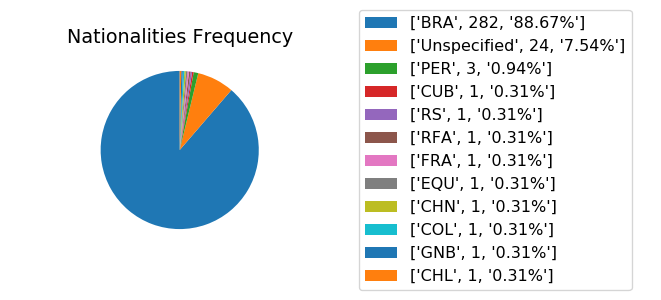

In [11]:
chartdata, fig1 = ll.get_freq_pie_chart(metadataframe.nacionalidade, "Nationalities Frequency")

What about the number of scientific initiation scholarships granted to the researchers while they were in grad school?

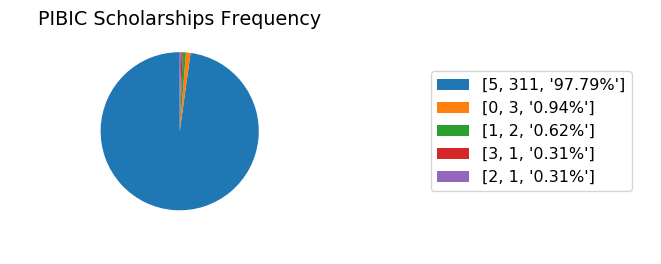

In [12]:
chartdata2, fig2 = ll.get_freq_pie_chart(metadataframe.quantasVezesPIBIC, "PIBIC Scholarships Frequency")

Finally, we can also analyze the last time these researchers have updated their Lattes CVs (as of today).

Upper-limit date invalid. Using default date of today.


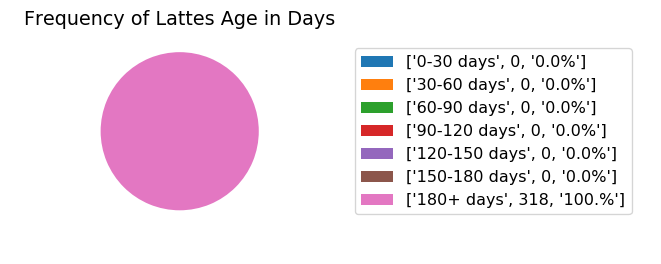

In [13]:
chartdata3, fig3 = ll.get_ctgrs_pie_chart(metadataframe.atualizado,"Frequency of Lattes Age in Days")

It is possible to perform the same analysis using an upper-limit date, so that the ages of the Lattes CVs are verified according to that given date.

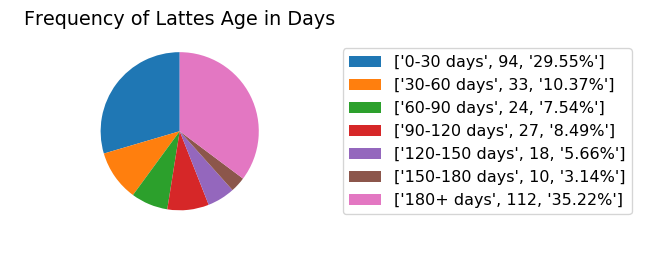

In [14]:
chartdata4, fig4 = ll.get_ctgrs_pie_chart(metadataframe.atualizado,"Frequency of Lattes Age in Days", '01062017')